## Brain tumor detection using YOLO v11 and Sam 2 Model

🧠 Brain Tumor Detection using YOLOv11 and SAM 2.
This project implements an advanced AI pipeline to detect and segment brain tumors from MRI scans. By combining the speed of YOLOv11 for object detection with the precision of SAM v2 (Segment Anything Model) for segmentation, this system aims to deliver accurate and efficient tumor localization.

🔍 Key Objectives
Detect tumor regions in MRI scans using YOLOv11

Apply SAM v2 for detailed tumor segmentation

Use a custom medical dataset structured in YOLO format

Leverage the power of Google Colab with GPU acceleration

🚀 Why This Project Matters
Early and accurate brain tumor detection can support medical professionals, reduce diagnostic time, and potentially save lives through timely intervention. This AI-driven approach represents a step toward accessible, automated medical imaging analysis.



##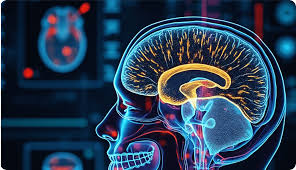    INTRODUCTION

## Setting up environment by downloading essential libraries

In [ ]:
# Installing the Ultralytics YOLO package
!pip install ultralytics

# Installing Meta AI's Segment Anything (SAM) model
!pip install segment-anything

# Installing OpenCV without GUI dependencies (useful in headless environments like Colab)
!pip install opencv-python-headless


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

# YAML file and data loading    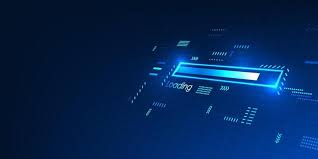

In [ ]:
# Creating configuration file brain_tumor.yaml

dataset_yaml = """
path: /content/drive/MyDrive/Colab Notebooks/tumor detection/dataset
train: train/images
val: valid/images

names:
  0: negative
  1: positive
"""

with open("brain_tumor.yaml", "w") as f:
    f.write(dataset_yaml)

print("brain_tumor.yaml file created successfully!")


brain_tumor.yaml file created successfully!


# Training the YOLO Model on Brain Tumor Dataset

In [ ]:
from ultralytics import YOLO

model = YOLO("yolo11n.pt")  # loaded pretrained YOLOv11 nano

results = model.train(
    data="brain-tumor.yaml",
    epochs=50,
    imgsz=640,
    batch=8,
    name="yolov11_brain_tumor",
    verbose=True)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 81.6MB/s]


Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=brain-tumor.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov11_brain_tumor, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretraine

100%|██████████| 4.22M/4.22M [00:00<00:00, 71.0MB/s]
Unzipping /content/datasets/brain-tumor.zip to /content/datasets/brain-tumor...: 100%|██████████| 2225/2225 [00:00<00:00, 2523.64file/s]

Dataset download success ✅ (1.7s), saved to /content/datasets



100%|██████████| 755k/755k [00:00<00:00, 21.2MB/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

  8                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  9                  -1  1    164608  ultralytics.nn.modules.block.SPPF            [256, 256, 5]                 
 10                  -1  1    249728  ultralytics.nn.modules.block.C2PSA           [256, 256, 1]                 
 11                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 12             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 13                  -1  1    111296  ultralytics.nn.modules.block.C3k2            [384, 128, 1, False]          
 14                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 15             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 16                  -1  1     32096  ultralytics.nn.modules.block.C3k2            [256,

train: Scanning /content/datasets/brain-tumor/labels/train... 878 images, 15 backgrounds, 0 corrupt: 100%|██████████| 893/893 [00:00<00:00, 2604.97it/s]

train: New cache created: /content/datasets/brain-tumor/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 84.8±64.2 MB/s, size: 3.4 KB)


val: Scanning /content/datasets/brain-tumor/labels/val... 223 images, 0 backgrounds, 0 corrupt: 100%|██████████| 223/223 [00:00<00:00, 1346.59it/s]

val: New cache created: /content/datasets/brain-tumor/labels/val.cache


Plotting labels to runs/detect/yolov11_brain_tumor/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov11_brain_tumor
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.22G      1.364      3.384      1.196          9        640: 100%|██████████| 112/112 [00:22<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.18it/s]

                   all        223        241      0.342      0.537       0.34      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.47G      1.283      2.476       1.19         14        640: 100%|██████████| 112/112 [00:18<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00,  8.16it/s]

                   all        223        241      0.395      0.651      0.381      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.49G      1.278      2.083       1.18          7        640: 100%|██████████| 112/112 [00:21<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00,  8.34it/s]

                   all        223        241       0.45      0.727      0.447      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       1.5G       1.24      1.861      1.161          7        640: 100%|██████████| 112/112 [00:18<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00,  8.51it/s]

                   all        223        241      0.378      0.561      0.351      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.52G      1.216      1.662       1.16          6        640: 100%|██████████| 112/112 [00:20<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00,  8.36it/s]

                   all        223        241      0.458      0.762      0.468      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      1.53G       1.22      1.567      1.162          6        640: 100%|██████████| 112/112 [00:18<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00,  8.36it/s]

                   all        223        241      0.407      0.741      0.449      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.54G      1.169      1.452       1.12          9        640: 100%|██████████| 112/112 [00:19<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00,  8.82it/s]

                   all        223        241      0.463      0.674      0.426      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      1.56G      1.155       1.39      1.113          9        640: 100%|██████████| 112/112 [00:18<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00,  8.51it/s]

                   all        223        241      0.448      0.786      0.457      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      1.58G      1.126      1.392       1.12          9        640: 100%|██████████| 112/112 [00:19<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00,  8.74it/s]

                   all        223        241      0.452      0.818      0.472      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.59G      1.134      1.313      1.114          5        640: 100%|██████████| 112/112 [00:18<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00,  8.77it/s]

                   all        223        241      0.458      0.807      0.478      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      1.61G      1.115      1.282      1.095          7        640: 100%|██████████| 112/112 [00:21<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00,  8.81it/s]

                   all        223        241      0.474      0.829      0.486      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      1.62G      1.094      1.267        1.1          6        640: 100%|██████████| 112/112 [00:18<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00,  8.67it/s]

                   all        223        241      0.458      0.774      0.487      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      1.63G      1.071      1.247      1.073          6        640: 100%|██████████| 112/112 [00:19<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00,  8.75it/s]

                   all        223        241      0.457      0.855      0.485      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      1.65G       1.09      1.259      1.077          4        640: 100%|██████████| 112/112 [00:18<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00,  7.47it/s]


                   all        223        241      0.459      0.815      0.489      0.346

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      1.67G      1.059      1.243      1.075          9        640: 100%|██████████| 112/112 [00:19<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00,  8.49it/s]

                   all        223        241      0.448      0.827      0.496      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      1.68G      1.075      1.207      1.086          5        640: 100%|██████████| 112/112 [00:18<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00,  8.21it/s]

                   all        223        241      0.455      0.846      0.491      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      1.69G      1.027      1.168      1.049          6        640: 100%|██████████| 112/112 [00:19<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00,  8.97it/s]

                   all        223        241      0.468      0.827      0.481      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      1.71G      1.022       1.18      1.062          6        640: 100%|██████████| 112/112 [00:18<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.98it/s]


                   all        223        241      0.433      0.853      0.475      0.349

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      1.72G      1.046      1.184      1.069          5        640: 100%|██████████| 112/112 [00:19<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00,  8.54it/s]

                   all        223        241      0.454      0.834        0.5      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      1.74G      1.025      1.164      1.036         10        640: 100%|██████████| 112/112 [00:18<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  6.50it/s]

                   all        223        241      0.463      0.866      0.489      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      1.75G      1.037      1.152      1.057          8        640: 100%|██████████| 112/112 [00:19<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00,  8.70it/s]

                   all        223        241      0.467      0.826      0.484      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      1.77G     0.9981      1.136      1.045          9        640: 100%|██████████| 112/112 [00:19<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.33it/s]

                   all        223        241      0.447      0.853      0.478      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      1.78G     0.9858      1.116      1.045          7        640: 100%|██████████| 112/112 [00:18<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00,  8.74it/s]

                   all        223        241      0.451      0.799      0.469      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50       1.8G     0.9792      1.106      1.026         10        640: 100%|██████████| 112/112 [00:18<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.42it/s]

                   all        223        241      0.454      0.859      0.465      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      1.81G     0.9703      1.085      1.024          9        640: 100%|██████████| 112/112 [00:18<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00,  8.93it/s]

                   all        223        241       0.45      0.899      0.471      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      1.83G     0.9877      1.098      1.026          3        640: 100%|██████████| 112/112 [00:18<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.91it/s]

                   all        223        241      0.458      0.857      0.474      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      1.84G     0.9764      1.079      1.037          6        640: 100%|██████████| 112/112 [00:18<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00,  8.72it/s]

                   all        223        241      0.442      0.852      0.475      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      1.86G     0.9317      1.065       1.02          4        640: 100%|██████████| 112/112 [00:18<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.37it/s]

                   all        223        241      0.434      0.855      0.456      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      1.87G     0.9859      1.085      1.033          9        640: 100%|██████████| 112/112 [00:18<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00,  8.80it/s]

                   all        223        241      0.433      0.834       0.43       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      1.89G     0.9303      1.046       1.02         10        640: 100%|██████████| 112/112 [00:18<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.66it/s]

                   all        223        241      0.445      0.884      0.464      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50       1.9G     0.9547      1.058      1.028          6        640: 100%|██████████| 112/112 [00:18<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00,  8.94it/s]

                   all        223        241      0.442      0.836      0.442      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      1.92G     0.9372      1.022      1.021          6        640: 100%|██████████| 112/112 [00:19<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.57it/s]

                   all        223        241       0.42      0.861      0.453      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      1.93G     0.9693      1.038       1.02         15        640: 100%|██████████| 112/112 [00:19<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00,  8.54it/s]

                   all        223        241      0.426      0.878      0.457      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      1.95G     0.9062      0.995      1.005          7        640: 100%|██████████| 112/112 [00:19<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00,  8.86it/s]

                   all        223        241      0.424      0.891      0.451      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      1.96G     0.9177     0.9942      1.008          9        640: 100%|██████████| 112/112 [00:18<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00,  8.60it/s]

                   all        223        241      0.455      0.852      0.477      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      1.98G     0.9305      1.003      1.008          8        640: 100%|██████████| 112/112 [00:19<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00,  8.97it/s]

                   all        223        241      0.424      0.883      0.457      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      1.99G     0.9236      0.978      1.011          5        640: 100%|██████████| 112/112 [00:18<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00,  8.70it/s]

                   all        223        241      0.419      0.903      0.441      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         2G     0.9329     0.9677      1.009          6        640: 100%|██████████| 112/112 [00:19<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00,  8.92it/s]

                   all        223        241      0.435      0.893      0.452       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.02G     0.8863     0.9393     0.9888          7        640: 100%|██████████| 112/112 [00:18<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00,  8.88it/s]

                   all        223        241       0.43      0.885      0.445      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.04G     0.8822     0.9251     0.9896         11        640: 100%|██████████| 112/112 [00:20<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00,  9.00it/s]

                   all        223        241      0.436      0.912      0.451      0.334


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.05G     0.8286     0.8888     0.9734          6        640: 100%|██████████| 112/112 [00:18<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00,  8.86it/s]

                   all        223        241      0.452      0.916      0.482      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.06G     0.8044     0.8536     0.9648          4        640: 100%|██████████| 112/112 [00:19<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00,  8.83it/s]

                   all        223        241      0.412      0.868      0.427      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.08G     0.8082     0.8391     0.9613          5        640: 100%|██████████| 112/112 [00:17<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00,  8.78it/s]

                   all        223        241      0.425      0.885      0.464      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.09G     0.7948     0.8428     0.9657          5        640: 100%|██████████| 112/112 [00:20<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00,  7.86it/s]

                   all        223        241      0.412       0.86      0.434      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.11G      0.797     0.8176     0.9523          5        640: 100%|██████████| 112/112 [00:18<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00,  8.82it/s]

                   all        223        241      0.439      0.879      0.456      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.12G     0.7728     0.7805     0.9428          5        640: 100%|██████████| 112/112 [00:18<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.94it/s]

                   all        223        241      0.441      0.854      0.476      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.14G     0.7662     0.7668     0.9484          5        640: 100%|██████████| 112/112 [00:17<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00,  8.88it/s]

                   all        223        241      0.424      0.879      0.445      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.15G     0.7686     0.7531     0.9476          5        640: 100%|██████████| 112/112 [00:18<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.80it/s]

                   all        223        241      0.433      0.866      0.458      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.17G     0.7566     0.7267     0.9354          5        640: 100%|██████████| 112/112 [00:18<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00,  9.02it/s]

                   all        223        241      0.421      0.864      0.436      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.18G     0.7316     0.7052      0.931          6        640: 100%|██████████| 112/112 [00:17<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00,  7.56it/s]

                   all        223        241      0.419      0.864      0.448       0.33



50 epochs completed in 0.296 hours.
Optimizer stripped from runs/detect/yolov11_brain_tumor/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/yolov11_brain_tumor/weights/best.pt, 5.5MB

Validating runs/detect/yolov11_brain_tumor/weights/best.pt...
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.86it/s]


                   all        223        241      0.454      0.834      0.498      0.369
              negative        142        154      0.558      0.805      0.613      0.453
              positive         81         87      0.349      0.862      0.384      0.285
Speed: 0.3ms preprocess, 4.5ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs/detect/yolov11_brain_tumor


# Perform Inference using Trained YOLOv11



image 1/395 /content/drive/MyDrive/Colab Notebooks/tumor detection/dataset/valid/images/glioma_1022_jpg.rf.ab6956aa8c8a25f994539c5cf6227064.jpg: 640x640 1 tumor, 29.9ms
image 2/395 /content/drive/MyDrive/Colab Notebooks/tumor detection/dataset/valid/images/glioma_104_jpg.rf.f5deabc016a8b3a913888b09baebacee.jpg: 640x640 1 tumor, 23.7ms
image 3/395 /content/drive/MyDrive/Colab Notebooks/tumor detection/dataset/valid/images/glioma_1088_jpg.rf.5542c8b3dc2add56cd7303d7007e3ae8.jpg: 640x640 3 tumors, 19.4ms
image 4/395 /content/drive/MyDrive/Colab Notebooks/tumor detection/dataset/valid/images/glioma_1109_jpg.rf.710d66962bf0db65050c34e750be6e7a.jpg: 640x640 1 tumor, 50.7ms
image 5/395 /content/drive/MyDrive/Colab Notebooks/tumor detection/dataset/valid/images/glioma_1164_jpg.rf.4f2cfa1dc0e93548eeef3f9c30e3b7ee.jpg: 640x640 1 tumor, 16.2ms
image 6/395 /content/drive/MyDrive/Colab Notebooks/tumor detection/dataset/valid/images/glioma_1226_jpg.rf.b459e0d24ecd906c121e9be1b88907c4.jpg: 640x640 3

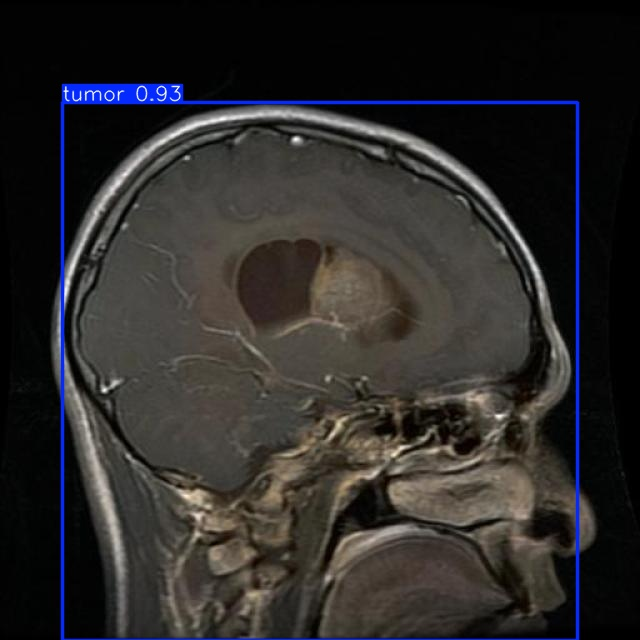

In [ ]:
from ultralytics import YOLO
from PIL import Image
from IPython.display import display
from pathlib import Path

#  Loading trained model
model = YOLO("/content/drive/MyDrive/Colab Notebooks/tumor detection/Tumor_Detection/YOLOv8_BrainTumor8/weights/best.pt")

#  Using real image from valid set
image_path = "/content/drive/MyDrive/Colab Notebooks/tumor detection/dataset/valid/images/"

#  Running inference
results = model(image_path, save=True)

#  output
save_dir = Path(results[0].save_dir)
image_name = Path(results[0].path).name
saved_image_path = save_dir / image_name

display(Image.open(saved_image_path))


## Detection on Test Set and Display All Results


In [ ]:
from ultralytics import YOLO
from PIL import Image
from IPython.display import display
from pathlib import Path

# Loading  trained YOLOv11 model
model = YOLO("/content/drive/MyDrive/Colab Notebooks/tumor detection/Tumor_Detection/YOLOv8_BrainTumor8/weights/best.pt")

# Running detection on all test images in folder
results = model("/content/drive/MyDrive/Colab Notebooks/tumor detection/dataset/test/images/", save=True)

# Displaying all results in notebook
for result in results:
    save_path = Path(result.save_dir) / Path(result.path).name
    display(Image.open(save_path))


## Extract and Print Bounding Box Outputs (Tumor Detections)

In [ ]:
from ultralytics import YOLO

# Loading  model
model = YOLO("/content/drive/MyDrive/Colab Notebooks/tumor detection/Tumor_Detection/YOLOv8_BrainTumor8/weights/best.pt")

# Running batched inference on a list of images
results = model("/content/drive/MyDrive/Colab Notebooks/tumor detection/dataset/test/images/", save=True)

for result in results:
    boxes = result.boxes # boxes object for bounding box outputs
    print(boxes)


image 1/191 /content/drive/MyDrive/Colab Notebooks/tumor detection/dataset/test/images/glioma_1025_jpg.rf.16f677de0fc84afa6b702f2fb8bdb3c2.jpg: 640x640 1 tumor, 8.7ms
image 2/191 /content/drive/MyDrive/Colab Notebooks/tumor detection/dataset/test/images/glioma_1128_jpg.rf.e50d9e41b37fb138368e116b69077ff7.jpg: 640x640 1 tumor, 8.4ms
image 3/191 /content/drive/MyDrive/Colab Notebooks/tumor detection/dataset/test/images/glioma_1166_jpg.rf.493c4f22cb16b11580eabec42f51c3de.jpg: 640x640 1 tumor, 8.4ms
image 4/191 /content/drive/MyDrive/Colab Notebooks/tumor detection/dataset/test/images/glioma_1246_jpg.rf.af4ca1f2e92bf1e7df0360136f128877.jpg: 640x640 1 tumor, 8.5ms
image 5/191 /content/drive/MyDrive/Colab Notebooks/tumor detection/dataset/test/images/glioma_20_jpg.rf.8fdf825f9ca269bc07429aee7781e8d9.jpg: 640x640 1 tumor, 10.5ms
image 6/191 /content/drive/MyDrive/Colab Notebooks/tumor detection/dataset/test/images/glioma_271_jpg.rf.6bc0439160ce05a380aa64a2dbac9a3c.jpg: 640x640 1 tumor, 8.6ms

##  Combining YOLOv11 with SAM for Tumor Segmentation

In [ ]:
from ultralytics import YOLO
from ultralytics import SAM
import torch

# Loading the YOLO model
yolo_model = YOLO("/content/drive/MyDrive/Colab Notebooks/tumor detection/Tumor_Detection/YOLOv8_BrainTumor8/weights/best.pt")

# Running batched Inference on a list of images
results = yolo_model("/content/drive/MyDrive/Colab Notebooks/tumor detection/dataset/test/images/", save=True)

# Loading the SAM model
sam_model = SAM("sam2_b.pt")

# Detecting device (CPU or GPU)
device = "cuda" if torch.cuda.is_available() else "cpu"

# Processing the results
for result in results:
    class_ids = result.boxes.cls.int().tolist()
    if len(class_ids):
        boxes = result.boxes.xyxy
        sam_results = sam_model
device = 0 if torch.cuda.is_available() else "cpu"
#  results
for result in results:
    class_ids = result.boxes.cls.int().tolist()
    if len(class_ids):
        boxes = result.boxes.xyxy
        sam_results = sam_model(
            result.orig_img,
            bboxes=boxes,
            verbose=False,
            save=True,
            device=device
        )


image 1/191 /content/drive/MyDrive/Colab Notebooks/tumor detection/dataset/test/images/glioma_1025_jpg.rf.16f677de0fc84afa6b702f2fb8bdb3c2.jpg: 640x640 1 tumor, 11.8ms
image 2/191 /content/drive/MyDrive/Colab Notebooks/tumor detection/dataset/test/images/glioma_1128_jpg.rf.e50d9e41b37fb138368e116b69077ff7.jpg: 640x640 1 tumor, 12.1ms
image 3/191 /content/drive/MyDrive/Colab Notebooks/tumor detection/dataset/test/images/glioma_1166_jpg.rf.493c4f22cb16b11580eabec42f51c3de.jpg: 640x640 1 tumor, 16.4ms
image 4/191 /content/drive/MyDrive/Colab Notebooks/tumor detection/dataset/test/images/glioma_1246_jpg.rf.af4ca1f2e92bf1e7df0360136f128877.jpg: 640x640 1 tumor, 10.4ms
image 5/191 /content/drive/MyDrive/Colab Notebooks/tumor detection/dataset/test/images/glioma_20_jpg.rf.8fdf825f9ca269bc07429aee7781e8d9.jpg: 640x640 1 tumor, 12.3ms
image 6/191 /content/drive/MyDrive/Colab Notebooks/tumor detection/dataset/test/images/glioma_271_jpg.rf.6bc0439160ce05a380aa64a2dbac9a3c.jpg: 640x640 1 tumor, 1

100%|██████████| 154M/154M [00:04<00:00, 35.6MB/s]


Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results saved to runs/segment/predict
Results save

## Display Segmented Output Images


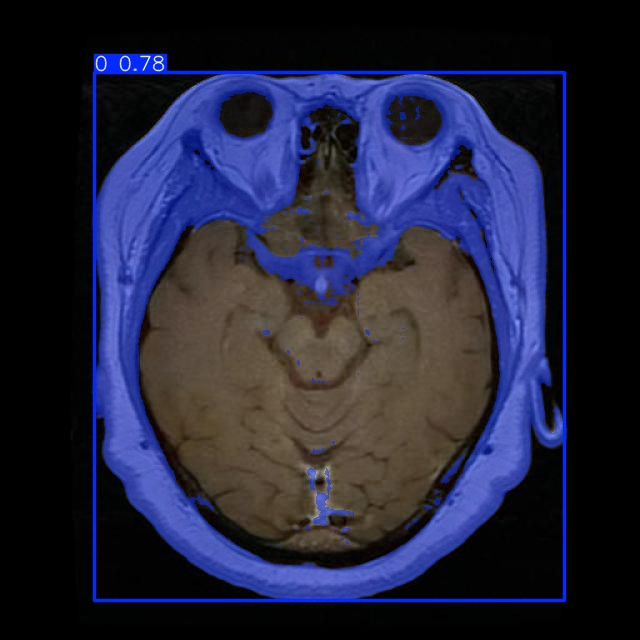

In [ ]:
from IPython.display import Image, display
import glob

segmented_images = sorted(glob.glob("runs/segment/predict/*.jpg"))

# Displaying first 5 segmented images
for img_path in segmented_images[:5]:
    display(Image(filename=img_path))


# Displaying overall results

Bar chart

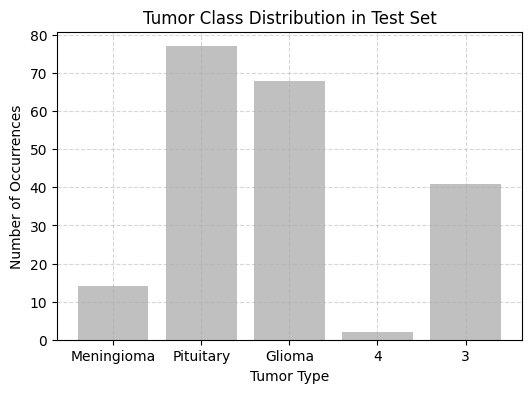

In [ ]:
import os
import matplotlib.pyplot as plt

label_dir = "/content/drive/MyDrive/Colab Notebooks/tumor detection/dataset/test/labels/"
class_counts = {}

# Count class occurrences
for label_file in os.listdir(label_dir):
    if label_file.endswith('.txt'):
        with open(os.path.join(label_dir, label_file), 'r') as f:
            for line in f:
                class_id = line.strip().split()[0]
                class_counts[class_id] = class_counts.get(class_id, 0) + 1

# Map class IDs to names
class_names = {'0': 'Glioma', '1': 'Meningioma', '2': 'Pituitary'}
mapped_counts = {class_names.get(k, k): v for k, v in class_counts.items()}

# Plot bar chart
plt.figure(figsize=(6,4))
plt.bar(mapped_counts.keys(), mapped_counts.values(), color='silver')
plt.xlabel("Tumor Type")
plt.ylabel("Number of Occurrences")
plt.title("Tumor Class Distribution in Test Set")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


Pie chart

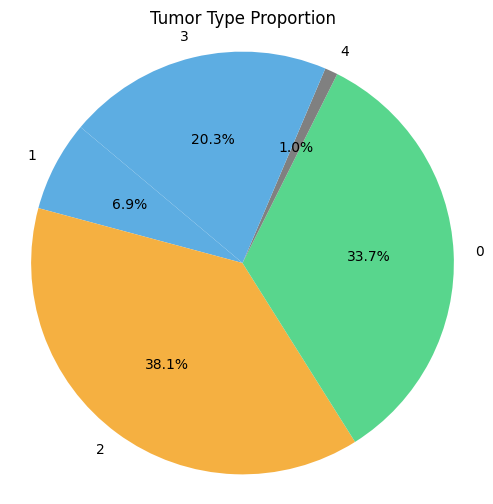

In [ ]:
# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts.values(),
        labels=class_counts.keys(),
        autopct='%1.1f%%',
        colors=['#5DADE2', '#F5B041', '#58D68D', 'gray'],
        startangle=140)

plt.title("Tumor Type Proportion")
plt.axis('equal')
plt.show()


## Visualizing Ground Truth Bounding Boxes on Test Images

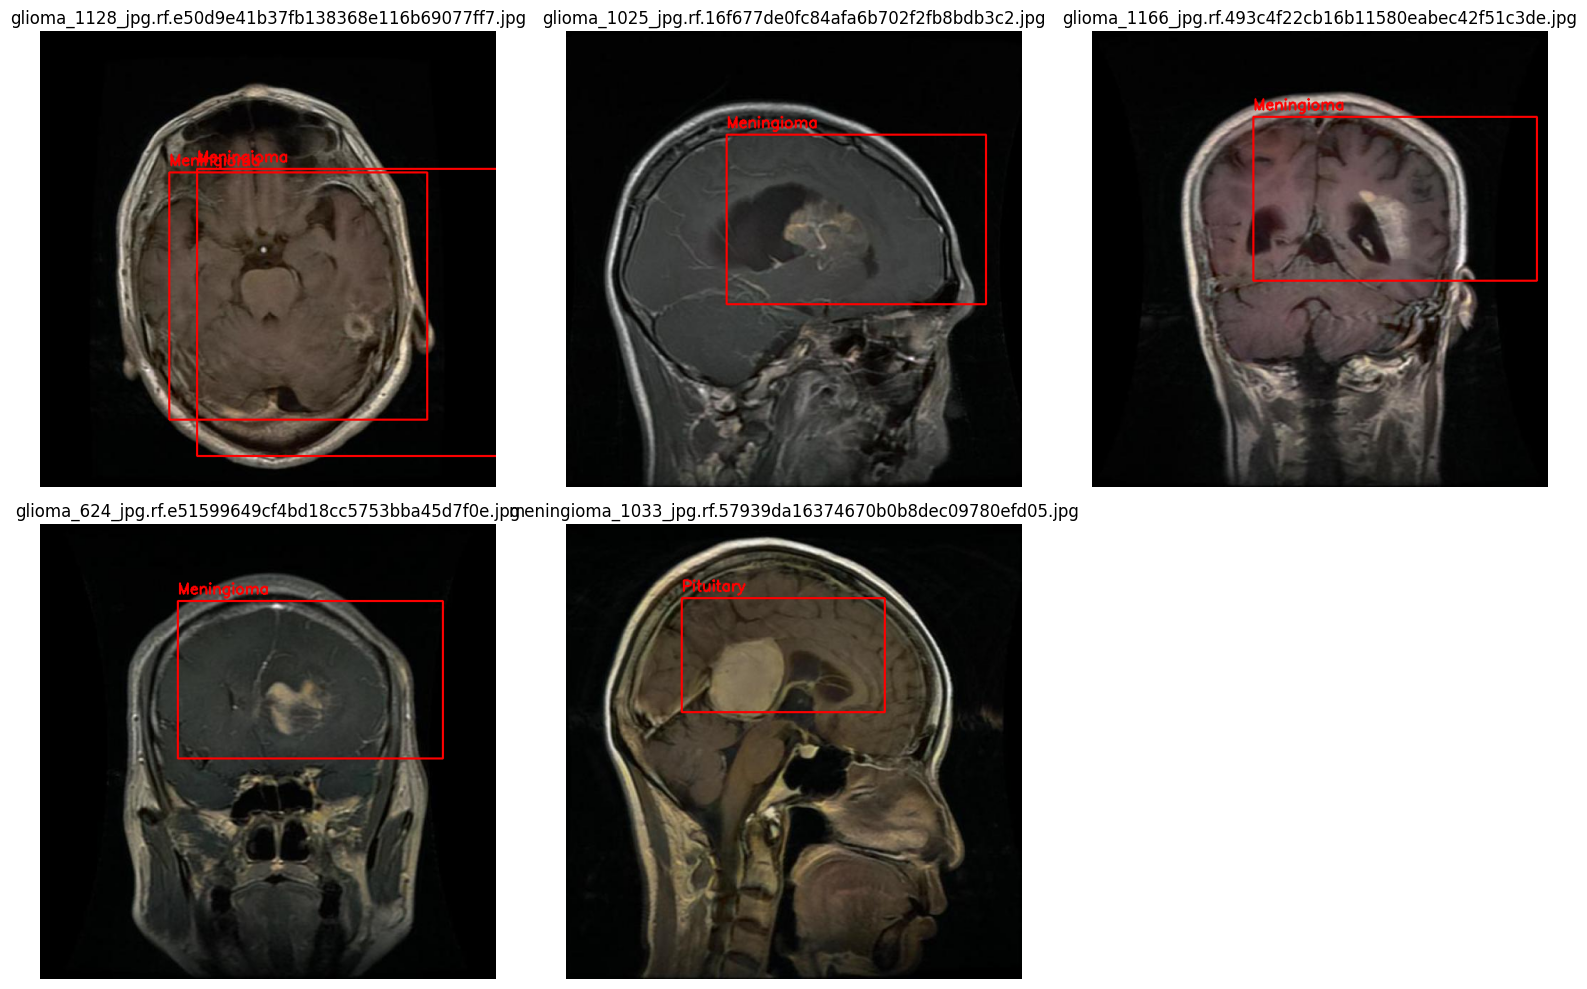

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Path to images and YOLO labels
image_dir = '/content/drive/MyDrive/Colab Notebooks/tumor detection/dataset/test/images'
label_dir = '/content/drive/MyDrive/Colab Notebooks/tumor detection/dataset/test/labels'

# Class names
class_names = {
    '0': 'Glioma',
    '1': 'Meningioma',
    '2': 'Pituitary'

}

# Get image files
image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg') or f.endswith('.png')]
plt.figure(figsize=(16, 10))

for idx, image_file in enumerate(image_files[:5]):
    img_path = os.path.join(image_dir, image_file)
    img = cv2.imread(img_path)
    if img is None:
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape

    label_path = os.path.join(label_dir, image_file.replace('.jpg', '.txt').replace('.png', '.txt'))
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            for line in f.readlines():
                parts = line.strip().split()
                if len(parts) >= 5:
                    class_id, x_center, y_center, width, height = map(float, parts[:5])
                    x1 = int((x_center - width / 2) * w)
                    y1 = int((y_center - height / 2) * h)
                    x2 = int((x_center + width / 2) * w)
                    y2 = int((y_center + height / 2) * h)
                    class_name = class_names.get(str(int(class_id)), "Unknown")

                    # Draw bounding box
                    cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
                    cv2.putText(img, class_name, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)

    plt.subplot(2, 3, idx + 1)
    plt.imshow(img)
    plt.title(image_file)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# Install Segment Anything dependencies
!pip install git+https://github.com/facebookresearch/segment-anything.git
!pip install opencv-python matplotlib


  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-rofodvix
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-rofodvix
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
  Created wheel for segment_anything: filename=segment_anything-1.0-py3-none-any.whl size=36592 sha256=4faa6ee580d3d3e4120d57e1e16b729cf2451834bd0251ec5358757f39cf2afd
  Stored in directory: /tmp/pip-ephem-wheel-cache-1an4mvhv/wheels/15/d7/bd/05f5f23b7dcbe70cbc6783b06f12143b0cf1a5da5c7b52dcc5
Successfully built segment_anything


In [ ]:
# Create a directory for checkpoints
!mkdir -p sam_checkpoints

# Download the SAM2 checkpoint (ViT-H model)
!wget -O sam_checkpoints/sam_vit_h.pth https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth


--2025-07-30 10:02:49--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.171.22.68, 3.171.22.33, 3.171.22.13, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.171.22.68|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘sam_checkpoints/sam_vit_h.pth’

sam_checkpoints/sam 100%[===================>]   2.39G   138MB/s    in 17s     

2025-07-30 10:03:06 (148 MB/s) - ‘sam_checkpoints/sam_vit_h.pth’ saved [2564550879/2564550879]



In [ ]:
import torch
from segment_anything import sam_model_registry, SamPredictor

# Load model
sam_checkpoint = "sam_checkpoints/sam_vit_h.pth"
model_type = "vit_h"

device = "cuda" if torch.cuda.is_available() else "cpu"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)


In [ ]:
import torch
from segment_anything import sam_model_registry, SamPredictor
import os

#  Setup
checkpoint_path = "sam_checkpoints/sam_vit_h.pth"
model_type = "vit_h"
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load SAM Model
if not os.path.exists(checkpoint_path):
    raise FileNotFoundError(f"Checkpoint not found at {checkpoint_path}. Please verify the path.")

sam = sam_model_registry[model_type](checkpoint=checkpoint_path)
sam.to(device)
predictor = SamPredictor(sam)

print("SAM2 model loaded successfully on", device)


SAM2 model loaded successfully on cpu


## Tumor Segmentation using SAM2 (Segment Anything Model - ViT-H)

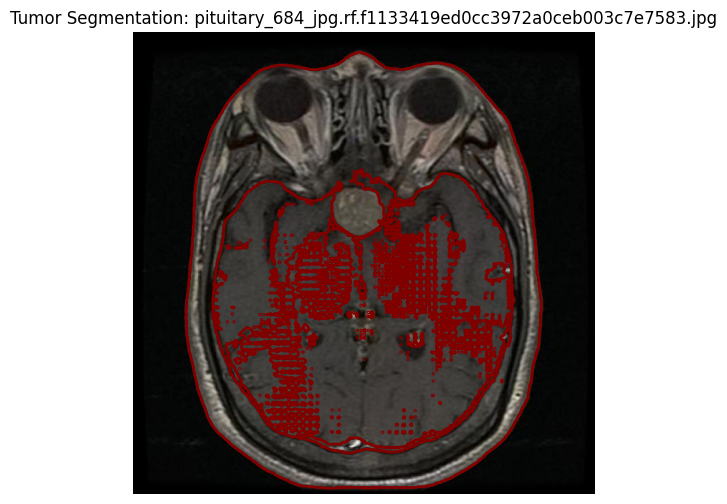

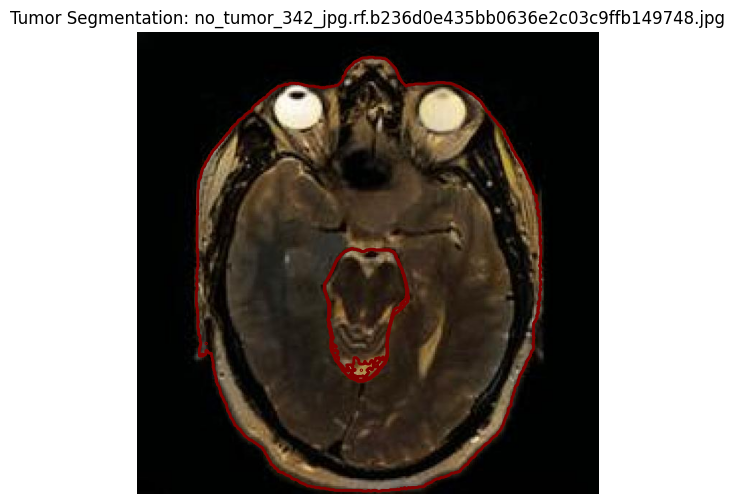

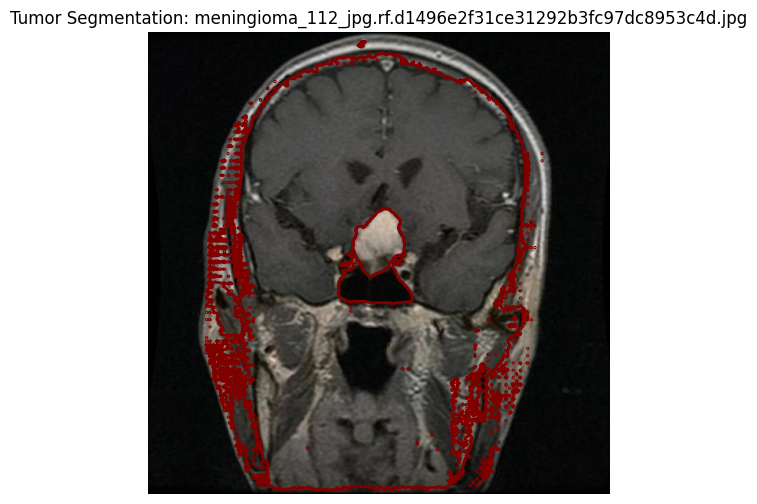

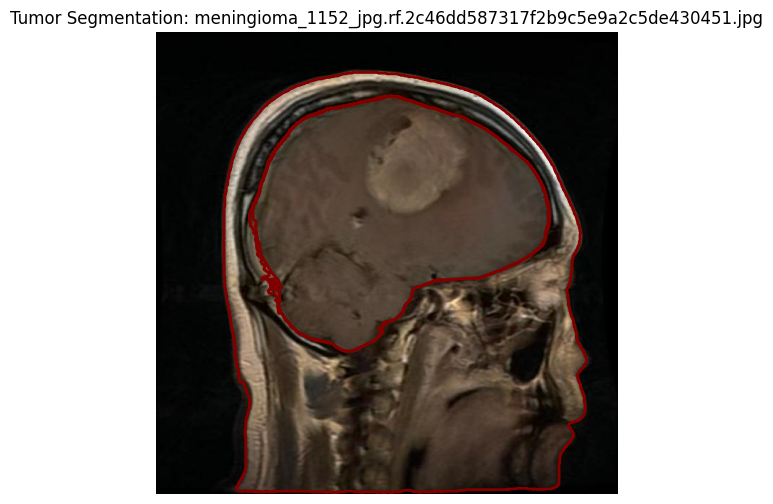

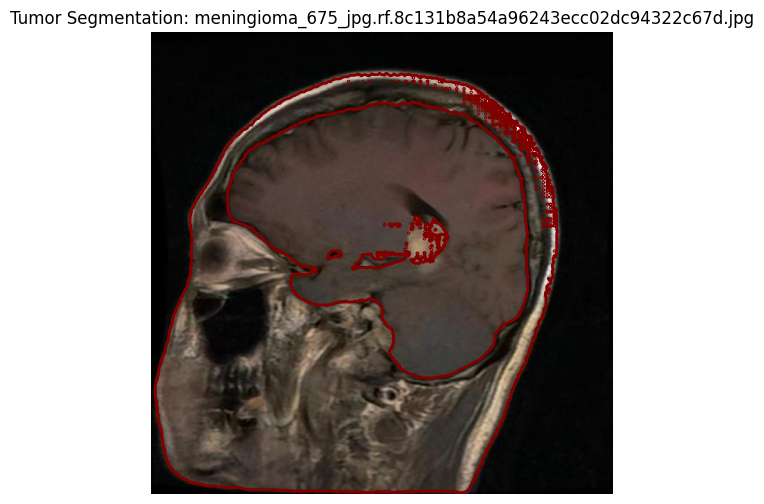

In [ ]:
import cv2
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from segment_anything.utils.transforms import ResizeLongestSide

#  image directory
image_dir = "/content/drive/MyDrive/Colab Notebooks/tumor detection/dataset/test/images"
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

#  5 random images
random_images = random.sample(image_files, 5)

# SAM preprocessing
transform = ResizeLongestSide(predictor.model.image_encoder.img_size)

for img_name in random_images:
    img_path = os.path.join(image_dir, img_name)
    image_bgr = cv2.imread(img_path)

    if image_bgr is None:
        print(f"Couldn't read: {img_name}")
        continue

    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    predictor.set_image(image_rgb)


    height, width = image_rgb.shape[:2]
    input_point = np.array([[width // 2, height // 2]])
    input_label = np.array([1])

    masks, scores, _ = predictor.predict(
        point_coords=input_point,
        point_labels=input_label,
        multimask_output=True
    )

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.imshow(image_rgb)
    for mask in masks:
        plt.contour(mask, colors='maroon', linewidths=2)
    plt.title(f"Tumor Segmentation: {img_name}")
    plt.axis('off')
    plt.show()
